# Homework 1
### 23/03/2022
### Federica Valeau, Tommaso Di Mario, Valeria Sepicacchi.
## Exercise 1: It's Prob-time (...again-.-)!
$$ f_{X,Z}(x, z) = \begin{cases}
  8 \cdot (x \cdot z) \quad for \quad  0<z<x<1, \\
       0 \quad otherwise.
\end{cases}
$$

### 1)
Our function, to be a legit joint pdf, has to satisfy two requirements:
- the pdf is always positive: this is always true since the support of both x and z is stricly positive
- the pdf integrates to one

$$ \int_{0}^{1}\int_{0}^{x}8 \cdot (x \cdot z) \quad dz\ dx = \int_{0}^{1}8 \cdot (x) \cdot \frac{z^2}{2}\Big|_{0}^{x} \; dx = \int_{0}^{1} 4 \cdot (x^3) \ dx = 4 \cdot \frac{x^4}{4}\Big|_{0}^{1} = 1 - 0 = 1
$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

def func(x):
    return 8 * x[0] * x[1] 

def prova(X,Y):
    Z = []
    for x in range(len(X)):
        Z.append([])
        for y in range(len(X[0])):
            if X[x][y] > Y[x][y]:
                Z[-1].append(8*X[x][y]*Y[x][y])
            else:
                Z[-1].append(0)
    return Z
          
# Grid for plotting in the search space
x = np.linspace(0, 1,100)
z = np.linspace(0, 1,100)
X, Z = np.meshgrid(x, z)
Y = prova(X,Z)

fig = go.Figure(data=[go.Surface(x=X, y=Z, z = Y)])
fig.update_layout(title='Joint PDF', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

To find the proportion of students who obtained a score greater than
0.5 in Statistics, we have to evaluate $P(Z>0.5)$. We computed this in two ways:
- using the joint probability $$ \int_{1/2}^{1} \int_{z}^{1} 8 \cdot (x \cdot z) \; dx \ dz =
   \int_{1/2}^{1} 8 \cdot z \cdot \left[\frac{x^2}{2}\right]_{z}^{1} dz =
   \int_{1/2}^{1} 4z - 4z^3 dz = 
   \left[ 2z^2 - z^4\right]_{1/2}^1 = 
   2 - 1 - (\frac{1}{2} - \frac{1}{16}) = \frac{9}{16}
$$


- using the marginal probability (we found the marginal probability in this way) 
$$ \int_{z}^{1} 8 \cdot (x) \cdot (z) \; dx = 8 \cdot z \cdot \left [ \frac{x^2}{2} \right]_{z}^{1} = 8 \cdot z \cdot ( \frac{1}{2} - \frac{z^2}{2} ) = 4z - 4z^3 $$
The probability of being greater than 0.5 is 9/16

The probability that a randomly selected student will have a Stat-score exactly equal to 0.5 is 0, since the probability that a continuous random variable equals an exact value is always zero. We can confirm that by integrating the marginal probability from 0.5 to 0.5, the result will still be zero. 

## 2)
$
W = log(Z) $

Using the marginal pdf $f_Z(z) = 4z - 4z^3$,
$$
F_W(w) = P(W\leq w) = P(log(Z) \leq w) = P(Z \leq e^w) = \int_{0}^{e^w} 4z - 4z^3 dz = 2z^2 - z^4 |_{0}^{e^w} = 2e^{2w} - e^{4w}
\\
f_W(w) =\frac{d}{dw}[F_W(w)] = \frac{d}{dw}[2e^{2w} - e^{4w}] = 4e^{2w} - 4e^{4w}
$$ 

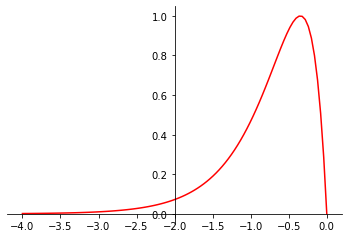

In [7]:
import matplotlib.pyplot as plt
import math
import numpy as np

# This is the plot of f(w)

# 100 linearly spaced numbers
x = np.linspace(-4,-0.00001,100)

# the function
y = (4*math.e**(2*x))*(1-math.e**(2*x))

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

We can find the value of W that has the smallest mean squared error by finding the expectation:
$$ E(W) = \int_{- \infty}^{0} w(4e^{2w} - 4e^{4w}) \ dw = \int_{- \infty}^{0} 4we^{2w}\ dw - \int_{- \infty}^{0} 4we^{4w} \ dw =\\ = 4\cdot \frac{xe^{2x}}{2} -4\int_{- \infty}^{0} \frac{e^{2x}}{2} dw + 4\cdot \frac{xe^{4x}}{4} -4\int_{- \infty}^{0} \frac{e^{4x}}{4} dw = \Big[ 2xe^{2x} - e^{2x} -xe^{4x} + \frac{e^{4x}}{4} \Big]_{-\infty}^{0} = -0.75
$$

Median of the log-Stat score
$$ m = \int_{- \infty}^{M} 4e^{2w} - 4e^{4w} \ dw \geq 0.5 \\ 2e^{2w} - e^{4w} \Big|_{-\infty}^{M} \geq 2e^{2M} - e^{4M} \geq 0.5, \quad  e^{2M} = t, \quad -t^2 + 2t - \frac{1}{2} = 0, \quad t = \frac{-2 \pm \sqrt{4 - 2}}{-2} = \frac{2 \pm \sqrt{2}}{2} = e^{2M}, \quad M = \frac{1}{2} \ ln\ (\frac{2 \pm \sqrt{2}}{2})
$$ 

Since only $  M = \frac{1}{2} \ ln\ (\frac{2 - \sqrt{2}}{2}) $ gives a valid result, it will be our median.

## 3) 
First we have to find the marginal PDF from the joint:
$$ f_{X}(x) = \int_{0}^{x} 8 \cdot (x \cdot z) \ dz =
   8 \cdot x \cdot \left[\frac{z^2}{2}\right]_{0}^{x} = 4x^3 \\ $$
   
Now we can find the best MSE predictor for the Stat-score 

$$
E(Z | X = 0.8) = \int_{0}^{x} z \cdot \frac{f_{X, Z}(x, z)}{f_X(x)} \ dz = \int_{0}^{x} z \cdot \frac{8xz}{4x^3} \ dz = \int_{0}^{x} \frac{2z^2}{x^2} \ dz = \frac{2z^3}{3x^2} \Big|_{0}^{x} = \frac{2x}{3} = 0.533
$$

## Exercise 2 Stat | $1^{st} $contact
## 1)
